# Preprocessing the Data

In [1]:
#Read CSV
import pandas as pd
creditone = pd.io.parsers.read_csv("C:\\Users\\caitl\\Downloads\\default of credit card clients.csv")

In [2]:
#Removing unneccesary vars, ID
creditone= creditone.drop("ID", axis=1)

In [3]:
#Rename Default Variable
creditone.rename(columns={'default payment next month' : 'Default'}, inplace=True)

# Practicing with Sci-Kit Learn

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl

# estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# model metrics/CV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [6]:
#examine my data
creditone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [7]:
#Selecting Data
LIMIT_BAL = creditone.iloc[1,1]

In [8]:
#Second way of selecting with Pandas
LIMIT_BAL = creditone['LIMIT_BAL']

In [9]:
#Selecting a range of Columns
variableName = creditone.iloc[:,0:4]
#selects all rows within first five columns

# Dividing the Data in Training and Testing Sets

In [10]:
#Select the features
features = creditone.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
#select the dependent variable
depVar = creditone['PAY_AMT6']

In [12]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [14]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [15]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

# Cross Validation

In [16]:
#Import the module into our project
from sklearn.model_selection import train_test_split

In [17]:
#example cross validation with train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [18]:
#doublecheck the split 
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

# SciKit Learn Format

In [20]:
#acessing the scikit learn estimator linear regression
from sklearn.linear_model import LinearRegression

In [21]:
#example of using tuning parameters
model = LinearRegression(n_jobs=10)

# Building and Choosing the Models

In [22]:
#Defining the Models. This is where we put tuning parameters
modelSVR = SVR(gamma='scale')
modelRF = RandomForestRegressor(n_estimators=10)
modelLR = LinearRegression()

In [23]:
#establishing a variable for the selected features
features = creditone.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [24]:
#varifying the dependent variable is correct
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [25]:
#Applying Models to the training and testing sets
#Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
#Support Vector Regression
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
#Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
#Choosing the right model
#Verify crossvalscore was imported correctly
from sklearn.model_selection import cross_val_score

In [29]:
#Get performance for the RFmodel
print(cross_val_score(modelRF, X_train, y_train, cv=3)) 

[0.46306503 0.83000727 0.87720299]


In [30]:
#Get performance for SVR model
print(cross_val_score(modelSVR, X_train, y_train, cv=3)) 

[-0.02396181 -0.01344716 -0.06636705]


In [31]:
#Get performance for linear regression
print(cross_val_score(modelLR, X_train, y_train, cv=3))

[1. 1. 1.]


In [32]:
#let's get the r-squared value for Random Forest
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv=3))
modelRF.score(X_train,y_train)

[0.40354792 0.77396051 0.92101672]


0.9816962440872009

In [33]:
#R-squared for SVR
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train, cv=3)) 
modelSVR.score(X_train,y_train)

[-0.02396181 -0.01344716 -0.06636705]


-0.01842595306078465

In [34]:
#R-squared for linear regression
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train, cv=3)) 
modelLR.score(X_train,y_train)

[1. 1. 1.]


1.0

# Using our model to make predictions

In [35]:
#Creating predictions variable
predictions = modelRF.predict(X_test)

In [36]:
#calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

In [37]:
#calculate R-squared
predRsquared = r2_score(y_test,predictions)

In [38]:
#Printing stats for our Predictions
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.841
RMSE: 5615.726


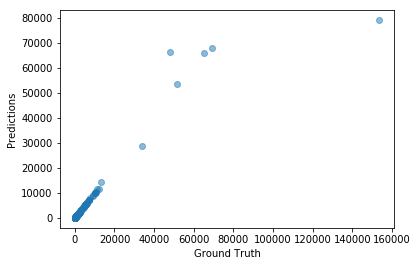

In [39]:
#Plotting the results
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();
#must figure out how to make the colors work on this correctly

# Creating models with the entire data set

# Dividing in training and testing sets

In [5]:
#Select the features
#First I will create models using all of the variables, then just demographic
features = creditone.iloc[:,0:23]
print('Summary of features')
features.head()

Summary of features


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
#select the dependent variable
depVar = creditone['Default']

In [7]:
# Training set 1 (as is)
X_train1 = features
y_train1 = depVar

In [8]:
# use train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1, test_size = 0.3 )

In [44]:
# examine that we have the right split
print(X_train1.shape, X_test1.shape)
print(y_train1.shape, y_test1.shape)

(21000, 23) (9000, 23)
(21000,) (9000,)


# Build the Models

In [9]:
#Defining the Models. This is where we put tuning parameters
RF = RandomForestClassifier()
kNN = KNeighborsClassifier()
GBM= GradientBoostingClassifier()

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)  
X_test1 = scaler.transform(X_test1) 

# KNN

In [48]:
# Gridsearch parameters for kNN
kNN_param = {
    'n_neighbors' : [5,10,20]
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
kNN_grid = GridSearchCV(estimator = kNN, param_grid = kNN_param, return_train_score = True, cv=10)
kNN_grid = kNN_grid.fit(X_train1, y_train1)

In [49]:
#Print best parameters
kNN_grid.cv_results_

{'mean_fit_time': array([0.05859072, 0.06413586, 0.07366536]),
 'std_fit_time': array([0.01097566, 0.00920791, 0.01133192]),
 'mean_score_time': array([0.28518198, 0.35304279, 0.46464844]),
 'std_score_time': array([0.05663222, 0.04564672, 0.06540291]),
 'param_n_neighbors': masked_array(data=[5, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5}, {'n_neighbors': 10}, {'n_neighbors': 20}],
 'split0_test_score': array([0.75440267, 0.77391718, 0.77582104]),
 'split1_test_score': array([0.75868634, 0.77201333, 0.78200857]),
 'split2_test_score': array([0.75857143, 0.77190476, 0.77952381]),
 'split3_test_score': array([0.74809524, 0.77333333, 0.77666667]),
 'split4_test_score': array([0.75428571, 0.77809524, 0.7747619 ]),
 'split5_test_score': array([0.75238095, 0.77904762, 0.7747619 ]),
 'split6_test_score': array([0.75761905, 0.78238095, 0.78      ]),
 'split7_test_score': array([0.74666667, 0.77238095, 0.

In [50]:
#Set classifiers to best parameters
kNN = kNN_grid.best_estimator_
#Fit to the data
kNN.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [51]:
#accuracy
scores = cross_val_score(kNN, X_train1, y_train1, cv=10)
print(scores.mean())

0.7777619981319723


In [52]:
#KNN prediction
kNNpred = kNN.predict(X_test1)
print(accuracy_score(y_test1,kNNpred))
print(classification_report(y_test1, kNNpred))

0.778
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      7022
           1       0.47      0.07      0.12      1978

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.63      0.52      0.50      9000
weighted avg       0.72      0.78      0.71      9000



# Random Forest

In [53]:
# Gridsearch parameters for RF
RF_param = {
    'n_estimators' : [10,20,30],
    'max_features' : ['auto', 'sqrt', 'log2']
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
RF_grid = GridSearchCV(estimator = RF, param_grid = RF_param, return_train_score = True, cv=10)
RF_grid = RF_grid.fit(X_train1, y_train1)

In [54]:
#Print best parameters
RF_grid.cv_results_

{'mean_fit_time': array([0.73608363, 1.48798404, 2.38077726, 0.68238125, 1.36706777,
        2.00167863, 0.65577669, 1.33990343, 2.99038393]),
 'std_fit_time': array([0.06540356, 0.17023315, 0.34320751, 0.06181284, 0.18269908,
        0.18557729, 0.02309462, 0.11212627, 0.87496458]),
 'mean_score_time': array([0.00984237, 0.02006848, 0.02860641, 0.00899487, 0.0194164 ,
        0.02745538, 0.0096365 , 0.01827285, 0.03908272]),
 'std_score_time': array([0.00107081, 0.00440003, 0.00557241, 0.0008335 , 0.00503789,
        0.00572181, 0.00099546, 0.00478742, 0.01891354]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt', 'log2',
                    'log2', 'log2'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, F

In [55]:
#set classifier to best parameters
RF = RF_grid.best_estimator_

In [56]:
#Run model with parameters
RF.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
#RF Accuracy
scores = cross_val_score(RF, X_train1, y_train1, cv=10)
print(scores.mean())

0.8132385772595845


In [58]:
#RF Prediction
RFpred = RF.predict(X_test1)
print(accuracy_score(y_test1,RFpred))
print(classification_report(y_test1, RFpred))

0.8131111111111111
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7022
           1       0.63      0.36      0.46      1978

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



# GBM

In [13]:
# Gridsearch parameters for GBM
GBM_param = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.5]
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
GBM_grid = GridSearchCV(estimator = GBM, param_grid = GBM_param, return_train_score = True, cv=10)
GBM_grid = GBM_grid.fit(X_train1, y_train1)

In [60]:
#Print best parameters
GBM_grid.cv_results_

{'mean_fit_time': array([ 4.50413454,  7.58520384, 16.07014108,  4.54620047,  9.98180327,
        17.27445507]),
 'std_fit_time': array([0.51485947, 0.3680089 , 5.11513553, 0.61675155, 1.63527059,
        1.7689893 ]),
 'mean_score_time': array([0.0084902 , 0.01334209, 0.01822901, 0.00799999, 0.01447976,
        0.01967187]),
 'std_score_time': array([0.00323173, 0.00521765, 0.00353419, 0.00235085, 0.00484498,
        0.00274159]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'n_estimators': 100},
  {'learning_rate': 0.1, 'n_estimators': 200},
  {'learning_rate': 0.1, 'n_estimators': 300},
  {'learning_rate': 0.5, 'n_estimato

In [14]:
# set the classifier to best combination of parameters
GBM = GBM_grid.best_estimator_

In [15]:
# GBM model
GBM.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
#accuracy
scores = cross_val_score(GBM, X_train1, y_train1, cv=10)
print(scores.mean())

0.8202382604254774


In [64]:
# GBM Prediction
GBMpred = GBM.predict(X_test1)
print(accuracy_score(y_test1,GBMpred))
print(classification_report(y_test1, GBMpred))

0.8222222222222222
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7022
           1       0.67      0.37      0.48      1978

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



# GBM Feature  Importance Plot

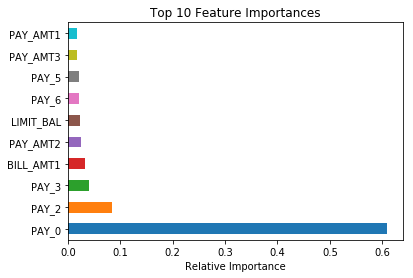

In [29]:
feat_importances = pd.Series(GBM.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

# Modeling with Demographic Features

In [31]:
#Select the features; just demographic
features = creditone.iloc[:,0:5]
print('Summary of features')
features.head()

Summary of features


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57


In [32]:
#select the dependent variable
depVar = creditone['Default']

In [33]:
# Training set 2
X_train2 = features
y_train2 = depVar

In [34]:
# use train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.3 )

In [35]:
# examine that we have the right split
print(X_train2.shape, X_test2.shape)
print(y_train2.shape, y_test2.shape)

(21000, 5) (9000, 5)
(21000,) (9000,)


# Build Demographic Models

In [36]:
#Defining the Models. This is where we put tuning parameters
RF2 = RandomForestClassifier()
kNN2 = KNeighborsClassifier()
GBM2 = GradientBoostingClassifier()

In [38]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)  
X_test2 = scaler.transform(X_test2) 

# KNN

In [39]:
# Gridsearch parameters for kNN
kNN_param = {
    'n_neighbors' : [5,10,20]
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
kNN_grid = GridSearchCV(estimator = kNN2, param_grid = kNN_param, return_train_score = True, cv=10)
kNN_grid = kNN_grid.fit(X_train2, y_train2)

In [40]:
#Set classifiers to best parameters
kNN2 = kNN_grid.best_estimator_
#Fit to the data
kNN2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [41]:
#accuracy
scores = cross_val_score(kNN2, X_train2, y_train2, cv=10)
print(scores.mean())

0.7736189920094897


In [54]:
#KNN prediction
kNNpred2 = kNN2.predict(X_test2)
print(accuracy_score(y_test2,kNNpred2))
print(classification_report(y_test2, kNNpred2))

0.7786666666666666
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      7053
           1       0.28      0.01      0.03      1947

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.53      0.50      0.45      9000
weighted avg       0.68      0.78      0.69      9000



# Random Forest

In [43]:
# Gridsearch parameters for RF
RF_param = {
    'n_estimators' : [10,20,30],
    'max_features' : ['auto', 'sqrt', 'log2']
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
RF_grid = GridSearchCV(estimator = RF2, param_grid = RF_param, return_train_score = True, cv=10)
RF_grid = RF_grid.fit(X_train2, y_train2)

In [44]:
#set classifier to best parameters
RF2 = RF_grid.best_estimator_

In [45]:
#Run model with parameters
RF2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
#RF Accuracy
scores = cross_val_score(RF2, X_train2, y_train2, cv=10)
print(scores.mean())

0.7258079693118169


In [47]:
#RF Prediction
RFpred2 = RF2.predict(X_test2)
print(accuracy_score(y_test2,RFpred2))
print(classification_report(y_test2, RFpred2))

0.7328888888888889
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      7053
           1       0.29      0.16      0.21      1947

   micro avg       0.73      0.73      0.73      9000
   macro avg       0.54      0.53      0.52      9000
weighted avg       0.69      0.73      0.70      9000



In [48]:
# Gridsearch parameters for GBM
GBM_param = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.5]
}
# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
# run the grid search
GBM_grid = GridSearchCV(estimator = GBM2, param_grid = GBM_param, return_train_score = True, cv=10)
GBM_grid = GBM_grid.fit(X_train2, y_train2)

In [50]:
# set the classifier to best combination of parameters
GBM2 = GBM_grid.best_estimator_

In [51]:
# GBM model
GBM2.fit(X_train2, y_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [52]:
#accuracy
scores = cross_val_score(GBM2, X_train2, y_train2, cv=10)
print(scores.mean())

0.775904774441208


In [53]:
# GBM Prediction
GBMpred2 = GBM2.predict(X_test2)
print(accuracy_score(y_test2,GBMpred2))
print(classification_report(y_test2, GBMpred2))

0.7835555555555556
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7053
           1       0.43      0.00      0.00      1947

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.61      0.50      0.44      9000
weighted avg       0.71      0.78      0.69      9000



The best performing model is still the GBM, although we have a decrease in accuracy.

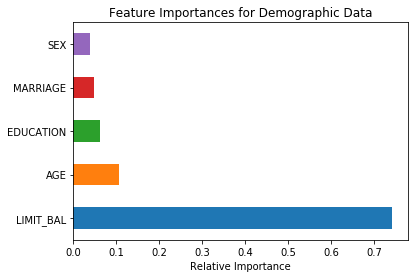

In [55]:
feat_importances = pd.Series(GBM2.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')

plt.title('Feature Importances for Demographic Data')
plt.xlabel('Relative Importance')
plt.show()